In [1]:
# function that takes the top ten percent CO from a file. Takes in all files and makes one file. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from coordinateSystems import GeographicSystem
from coordinateSystems import TangentPlaneCartesianSystem

In [2]:
def bot_ten_SCK2(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK2.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < stat[4]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [3]:
def top_ten_SCK2(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK2.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] > stat[12]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [4]:
def all_days_SCK2(filelist,var,output_file):
    '''
    Generates a new file of files combined. Only for SCK2.
    Inputs the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        #stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < 10000000.):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [5]:
datalist = list([             # ommitted Oct2 because diff route
                 
                 'Mar2.csv',#1
                 'Mar4.csv',
                 'Mar7.csv',
                 'Mar14.csv', 
                 'Mar21.csv',#5  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',
                 'Mar29.csv',
                 'Mar30.csv',#10
                 'Apr4.csv',
                 'Apr5.csv',
                 'Apr6.csv',
                 'Apr7.csv',
                 'Apr13.csv',#15
                 'Apr14.csv',
                 'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',#20
                 'May5.csv',
                 'May6.csv'#22
                              ])
                 
print datalist

['Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr6.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv', 'Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


In [6]:
bot_ten_SCK2(datalist,'SCK2_CO','CO_ten_SCK2.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr6.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv
Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [7]:
tenCO = pd.read_csv('CO_ten_SCK2.csv')

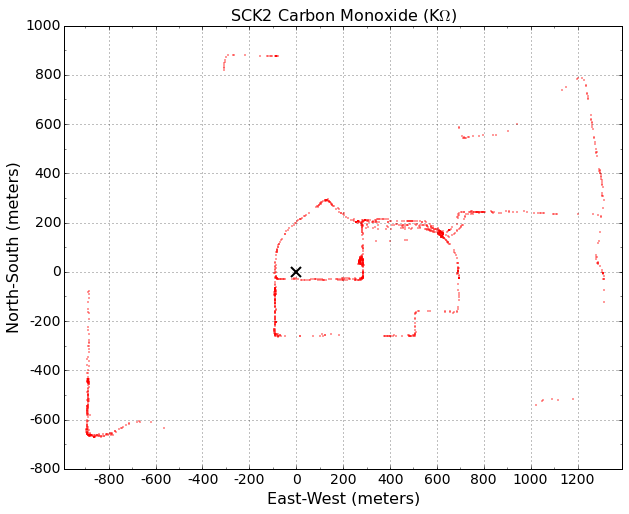

In [8]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(12,1,(1,8))
ax.set_xlim(-990,1390)
ax.set_ylim(-800,1000)
ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
ax.scatter(tenCO['X(m)'],tenCO['Y(m)'],s=2,c='r',linewidth=0)

ax.set_title('SCK2 Carbon Monoxide (K$\Omega$)',fontsize=16)
ax.set_xlabel('East-West (meters)',fontsize=16)
ax.set_ylabel('North-South (meters)',fontsize=16)
majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(100)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=14)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_locator(minorLocator)
ax.grid()
#plt.savefig('ALL_CO_ten_SCK2', format='png', dpi=300)

In [9]:
top_ten_SCK2(datalist,'V_r','V_r_ten_SCK2.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr6.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv
Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [10]:
tenVr = pd.read_csv('V_r_ten_SCK2.csv')

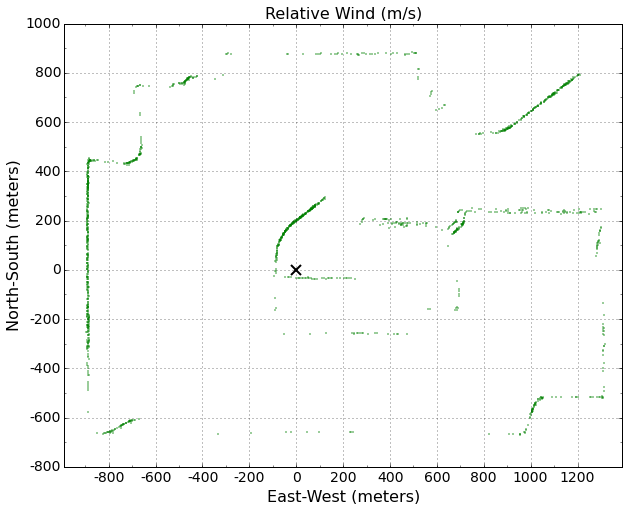

In [11]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(12,1,(1,8))
ax.set_xlim(-990,1390)
ax.set_ylim(-800,1000)
ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
ax.scatter(tenVr['X(m)'],tenVr['Y(m)'],s=2,c='green',linewidth=0)

ax.set_title('Relative Wind (m/s)',fontsize=16)
ax.set_xlabel('East-West (meters)',fontsize=16)
ax.set_ylabel('North-South (meters)',fontsize=16)
majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(100)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=14)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_locator(minorLocator)
ax.grid()
#plt.savefig('ALL_Vr_ten', format='png', dpi=300)

In [12]:
top_ten_SCK2(datalist,'SCK2_NO2','NO2_ten_SCK2.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr6.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv
Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [13]:
tenNO2 = pd.read_csv('NO2_ten_SCK2.csv')

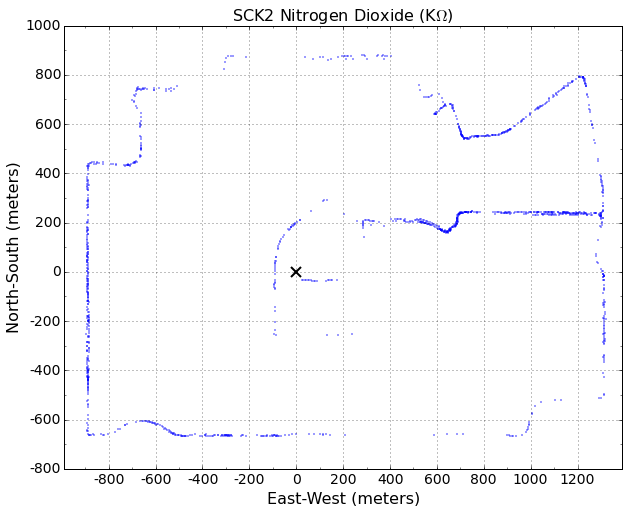

In [16]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(12,1,(1,8))
ax.set_xlim(-990,1390)
ax.set_ylim(-800,1000)
ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
ax.scatter(tenNO2['X(m)'],tenNO2['Y(m)'],s=2,c='blue',linewidth=0)

ax.set_title('SCK2 Nitrogen Dioxide (K$\Omega$)',fontsize=16)
ax.set_xlabel('East-West (meters)',fontsize=16)
ax.set_ylabel('North-South (meters)',fontsize=16)
majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(100)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=14)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_locator(minorLocator)
ax.grid()
#plt.savefig('ALL_NO2_ten_SCK2', format='png', dpi=300)

In [15]:
all_days_SCK2(datalist,'SCK2_CO','CO_ALL_SCK2.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr6.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv
Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [17]:
datalist_cases = list([             # ommitted Oct2 because diff route
                 
                 #'Mar2.csv',#1
                 #'Mar4.csv',
                 #'Mar7.csv',
                 #'Mar14.csv', 
                 #'Mar21.csv',#5  
                 #'Mar22.csv', 
                 #'Mar25.csv', 
                 #'Mar28.csv',
                 #'Mar29.csv',
                 #'Mar30.csv',#10
                 #'Apr4.csv',
                 #'Apr5.csv',
                 #'Apr6.csv',
                 #'Apr7.csv',
                 #'Apr13.csv',#15
                 #'Apr14.csv',
                 #'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',#20
                 'May5.csv',
                 'May6.csv'#22
                              ])
                 
print datalist_cases

['Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


In [19]:
all_days_SCK2(datalist_cases,'SCK2_CO','CO_ALL_SCK2_cases.csv')

Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv
